In [47]:
import numpy as np
import matplotlib.pyplot as plt

from landlab import RasterModelGrid
from landlab.plot import imshow_grid
from basis.src.tvd_advection import AdvectTVD

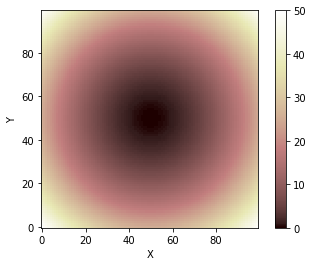

In [48]:
grid = RasterModelGrid((100, 100), 1.)

velocity = grid.add_zeros('velocity', at = 'link')
velocity[grid.horizontal_links] += 2.

field = ((grid.node_x - 50)/10)**2 + ((grid.node_y - 50)/10)**2
grid.add_field('field', field, at = 'node')

imshow_grid(grid, 'field')

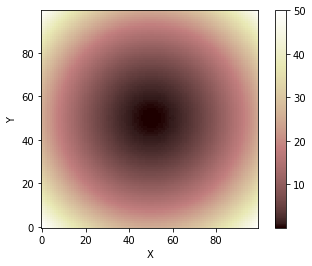

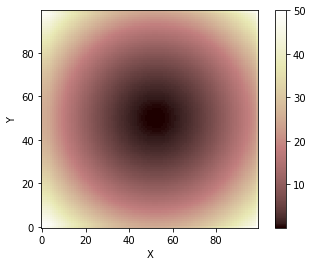

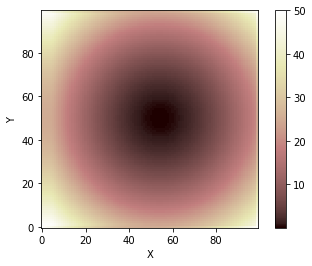

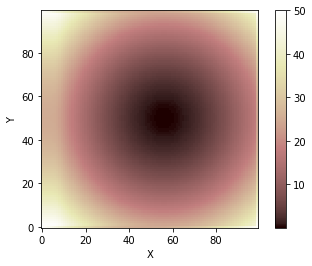

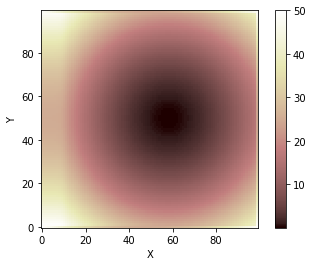

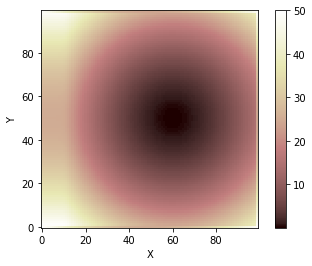

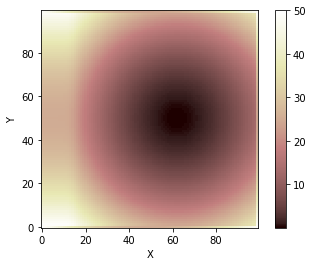

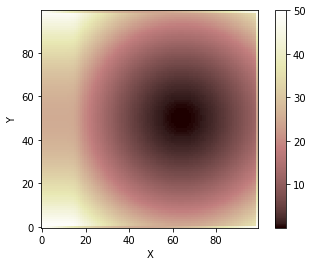

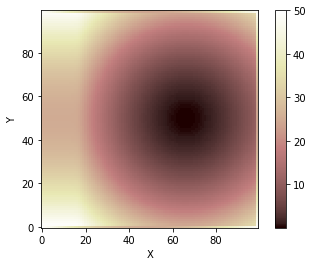

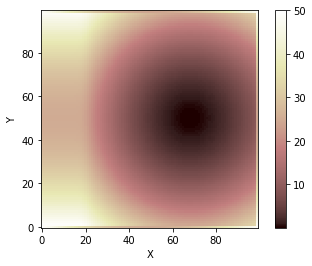

In [49]:
tvd = AdvectTVD(grid, 'field', 'velocity')

for i in range(100):
    tvd.update(0.1)
    
    if i % 10 == 0:
        imshow_grid(grid, 'field')
        plt.show()